In [2]:
df= pd.read_csv('./train.csv', encoding='utf-8')
df

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5


In [3]:
temperature_name = ['X00','X07','X28','X31','X32'] # 기온
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향
sensor_name = ['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']

In [4]:
df1 = df.loc[:4319]

In [5]:
df1.dropna(axis=1, inplace=True)

In [6]:
hour= pd.Series((df1.index%144/6).astype(int))

In [7]:
df1['hour'] = hour

In [8]:
df1

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,hour
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,19.5,987.8,1.7,0.4,0.0,1007.8,988.0,21.3,1007.8,...,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0,23
4316,4316,19.3,987.7,2.1,0.9,0.0,1007.8,988.1,21.3,1008.0,...,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5,23
4317,4317,19.5,987.8,0.9,1.3,0.0,1007.8,988.3,21.2,1008.1,...,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0,23
4318,4318,20.0,987.8,1.4,0.5,0.0,1007.8,988.3,21.1,1008.1,...,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0,23


In [9]:
X_30s = df1.drop(columns=sensor_name)
X_30s.drop(columns=['X14', 'X16', 'X19'], inplace=True)
X_30s

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0,0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0,0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0,0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0,0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,19.5,987.8,1.7,0.4,0.0,1007.8,988.0,21.3,1007.8,...,18.8,19.4,1008.2,16.68,272.9,0.0,82.3,74.3,0.0,23
4316,4316,19.3,987.7,2.1,0.9,0.0,1007.8,988.1,21.3,1008.0,...,18.6,18.5,1008.4,16.68,315.9,0.0,82.4,74.8,0.0,23
4317,4317,19.5,987.8,0.9,1.3,0.0,1007.8,988.3,21.2,1008.1,...,18.4,19.1,1008.4,16.68,343.3,0.0,82.8,75.4,0.0,23
4318,4318,20.0,987.8,1.4,0.5,0.0,1007.8,988.3,21.1,1008.1,...,18.2,19.0,1008.4,16.68,341.7,0.0,82.8,75.8,0.0,23


In [10]:
sensor = df1[sensor_name]
sensor

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,22.0,22.5,22.5,26.0,26.0,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0
4316,22.0,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5
4317,21.5,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0
4318,21.5,22.0,22.0,25.5,25.5,20.5,20.0,20.0,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0


In [11]:
for x in direction_name:
    X_30s[x] = X_30s[x].apply(lambda x: 0 if x < 90 else 1 if x < 180 else 2 if x < 270 else 3)
# 북동 : 0 / 남동 : 1 / 남서 : 2 / 북서 : 3

In [12]:
for x in water_name:
    for i in range(1, len(x)):
        X_30s[x].loc[i] = X_30s[x].loc[i] - X_30s[x].loc[i-1]

In [13]:
for x in water_name:
    X_30s[x] = X_30s[x].apply(lambda x: 0 if x == 0 else 1)

In [14]:
X_30s.drop(columns=['id'], axis=1, inplace=True)

In [15]:
water_name

['X04', 'X10', 'X21', 'X36', 'X39']

In [16]:
direction_name

['X13', 'X15', 'X17', 'X25', 'X35']

In [17]:
X_30s.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X15', 'X17', 'X18', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'hour'],
      dtype='object')

In [18]:
formulas = temperature_name + localpress_name + humidity_name + sun_name + speed_name
formulas = ['scale({})'.format(x) for x in formulas]
formulas

['scale(X00)',
 'scale(X07)',
 'scale(X28)',
 'scale(X31)',
 'scale(X32)',
 'scale(X01)',
 'scale(X06)',
 'scale(X22)',
 'scale(X27)',
 'scale(X29)',
 'scale(X12)',
 'scale(X20)',
 'scale(X30)',
 'scale(X37)',
 'scale(X38)',
 'scale(X11)',
 'scale(X34)',
 'scale(X02)',
 'scale(X03)',
 'scale(X18)',
 'scale(X24)',
 'scale(X26)']

In [19]:
formulas2 = water_name + direction_name
formulas2.append('hour')
formulas2 = ['C({})'.format(x) for x in formulas2]
formulas2

['C(X04)',
 'C(X10)',
 'C(X21)',
 'C(X36)',
 'C(X39)',
 'C(X13)',
 'C(X15)',
 'C(X17)',
 'C(X25)',
 'C(X35)',
 'C(hour)']

In [20]:
formulas = formulas + formulas2

In [21]:
a = '+'.join(formulas)
a

'scale(X00)+scale(X07)+scale(X28)+scale(X31)+scale(X32)+scale(X01)+scale(X06)+scale(X22)+scale(X27)+scale(X29)+scale(X12)+scale(X20)+scale(X30)+scale(X37)+scale(X38)+scale(X11)+scale(X34)+scale(X02)+scale(X03)+scale(X18)+scale(X24)+scale(X26)+C(X04)+C(X10)+C(X21)+C(X36)+C(X39)+C(X13)+C(X15)+C(X17)+C(X25)+C(X35)+C(hour)'

In [22]:
X_30s

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,8.2,10.7,1010.1,0.00,2,0,77.2,62.6,0,0
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,8.3,10.3,1010.1,0.00,2,0,77.3,63.5,0,0
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,8.0,9.7,1010.0,0.00,2,0,77.3,63.9,0,0
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,7.7,9.4,1010.1,0.00,2,0,77.5,64.5,0,0
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,7.4,9.4,1010.1,0.00,1,0,78.0,65.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,18.8,19.4,1008.2,16.68,3,0,82.3,74.3,0,23
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.6,18.5,1008.4,16.68,3,0,82.4,74.8,0,23
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,18.4,19.1,1008.4,16.68,3,0,82.8,75.4,0,23
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,18.2,19.0,1008.4,16.68,3,0,82.8,75.8,0,23


## Y00

In [23]:
Y00_df = pd.concat([X_30s, sensor['Y00']], axis=1)
Y00_df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y00
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,12.5
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,12.5
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,12.0
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,12.0
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,22.0
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,22.0
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,21.5
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,21.5


In [24]:
model1 = sm.OLS.from_formula("Y00 ~ scale(X00)+scale(X07)+scale(X28)+scale(X31)+scale(X32)+scale(X01)+scale(X06)+scale(X22)+scale(X27)+scale(X29)+scale(X12)+scale(X20)+scale(X30)+scale(X37)+scale(X38)+scale(X11)+scale(X34)+scale(X02)+scale(X03)+scale(X18)+scale(X24)+scale(X26)+C(X04)+C(X10)+C(X21)+C(X36)+C(X39)+C(X13)+C(X15)+C(X17)+C(X25)+C(X35)+C(hour)", Y00_df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y00   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     8823.
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        11:43:34   Log-Likelihood:                -1831.6
No. Observations:                4320   AIC:                             3795.
Df Residuals:                    4254   BIC:                             4216.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.9936      0.043    509.663

In [25]:
from sklearn.model_selection import KFold

In [26]:
kfold = KFold(5, shuffle=True, random_state=13)

In [27]:
N = len(Y00_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y00_df.iloc[idx_train]
dfX_test = Y00_df.iloc[idx_test]

In [28]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model0 = sm.OLS.from_formula("Y00 ~ 1 +" + a, data=dfX_train)
    result0 = model0.fit()
    
    pred = result0.predict(df_test)
    rss = ((df_test.Y00 - pred) ** 2).sum()
    tss = ((df_test.Y00 - df_test.Y00.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result0.rsquared, rsquared))

학습 R2 = 0.99272483, 검증 R2 = 0.99242741
학습 R2 = 0.99272483, 검증 R2 = 0.99215678
학습 R2 = 0.99272483, 검증 R2 = 0.99328929
학습 R2 = 0.99272483, 검증 R2 = 0.99281616
학습 R2 = 0.99272483, 검증 R2 = 0.99284578


In [29]:
pred = result0.predict(dfX_test)
rss = ((dfX_test.Y00 - pred) ** 2).sum()
tss = ((dfX_test.Y00 - dfX_test.Y00.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

0.9923736912649597


## Y01

In [30]:
Y01_df = pd.concat([X_30s, sensor['Y01']], axis=1)
Y01_df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y01
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,11.5
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,11.0
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,11.0
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,11.0
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,22.5
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,22.5
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,22.5
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,22.0


In [31]:
N = len(Y01_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y01_df.iloc[idx_train]
dfX_test = Y01_df.iloc[idx_test]

In [32]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model1 = sm.OLS.from_formula("Y01 ~ 1 +" + a, data=dfX_train)
    result1 = model1.fit()
    
    pred = result1.predict(df_test)
    rss = ((df_test.Y01 - pred) ** 2).sum()
    tss = ((df_test.Y01 - df_test.Y01.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result1.rsquared, rsquared))

학습 R2 = 0.98413713, 검증 R2 = 0.98378369
학습 R2 = 0.98413713, 검증 R2 = 0.98328775
학습 R2 = 0.98413713, 검증 R2 = 0.98360291
학습 R2 = 0.98413713, 검증 R2 = 0.98524484
학습 R2 = 0.98413713, 검증 R2 = 0.98458787


In [33]:
pred = result1.predict(dfX_test)
rss = ((dfX_test.Y01 - pred) ** 2).sum()
tss = ((dfX_test.Y01 - dfX_test.Y01.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

0.9812739427374754


## Y02

In [34]:
Y02_df = pd.concat([X_30s, sensor['Y02']], axis=1)
Y02_df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y02
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,11.0
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,11.0
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,11.0
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,11.0
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,22.5
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,22.5
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,22.5
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,22.0


In [35]:
N = len(Y02_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y02_df.iloc[idx_train]
dfX_test = Y02_df.iloc[idx_test]

In [36]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model2 = sm.OLS.from_formula("Y02 ~ 1 +" + a, data=dfX_train)
    result2 = model2.fit()
    
    pred = result2.predict(df_test)
    rss = ((df_test.Y02 - pred) ** 2).sum()
    tss = ((df_test.Y02 - df_test.Y02.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result2.rsquared, rsquared))

pred = result2.predict(dfX_test)
rss = ((dfX_test.Y02 - pred) ** 2).sum()
tss = ((dfX_test.Y02 - dfX_test.Y02.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.98337319, 검증 R2 = 0.98398663
학습 R2 = 0.98337319, 검증 R2 = 0.98194591
학습 R2 = 0.98337319, 검증 R2 = 0.98332113
학습 R2 = 0.98337319, 검증 R2 = 0.98376697
학습 R2 = 0.98337319, 검증 R2 = 0.98364382
0.9813744364414267


## Y03

In [37]:
Y03_df = pd.concat([X_30s, sensor['Y03']], axis=1)
Y03_df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y03
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,20.0
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,20.0
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,19.5
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,19.5
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,26.0
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,26.0
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,26.0
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,25.5


In [38]:
N = len(Y03_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y03_df.iloc[idx_train]
dfX_test = Y03_df.iloc[idx_test]

In [39]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model3 = sm.OLS.from_formula("Y03 ~ 1 +" + a, data=dfX_train)
    result3 = model3.fit()
    
    pred = result3.predict(df_test)
    rss = ((df_test.Y03 - pred) ** 2).sum()
    tss = ((df_test.Y03 - df_test.Y03.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result3.rsquared, rsquared))

pred = result3.predict(dfX_test)
rss = ((dfX_test.Y03 - pred) ** 2).sum()
tss = ((dfX_test.Y03 - dfX_test.Y03.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.94846634, 검증 R2 = 0.94657794
학습 R2 = 0.94846634, 검증 R2 = 0.94653673
학습 R2 = 0.94846634, 검증 R2 = 0.95014468
학습 R2 = 0.94846634, 검증 R2 = 0.95104291
학습 R2 = 0.94846634, 검증 R2 = 0.94797948
0.9473344365714367


## Y04

In [40]:
Y04_df = pd.concat([X_30s, sensor['Y04']], axis=1)
Y04_df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y04
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,20.0
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,20.0
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,19.5
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,19.5
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,26.0
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,25.5
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,25.5
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,25.5


In [41]:
N = len(Y04_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y04_df.iloc[idx_train]
dfX_test = Y04_df.iloc[idx_test]

In [42]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model4 = sm.OLS.from_formula("Y04 ~ 1 +" + a, data=dfX_train)
    result4 = model4.fit()
    
    pred = result4.predict(df_test)
    rss = ((df_test.Y04 - pred) ** 2).sum()
    tss = ((df_test.Y04 - df_test.Y04.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result4.rsquared, rsquared))

pred = result4.predict(dfX_test)
rss = ((dfX_test.Y04 - pred) ** 2).sum()
tss = ((dfX_test.Y04 - dfX_test.Y04.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.94796568, 검증 R2 = 0.94734167
학습 R2 = 0.94796568, 검증 R2 = 0.94561380
학습 R2 = 0.94796568, 검증 R2 = 0.94708696
학습 R2 = 0.94796568, 검증 R2 = 0.95117340
학습 R2 = 0.94796568, 검증 R2 = 0.94848745
0.9466163967513249


## Y05

In [43]:
Y05_df = pd.concat([X_30s, sensor['Y05']], axis=1)
Y05_df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y05
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,10.5
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,10.0
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,10.0
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,9.5
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,21.0
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,21.0
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,21.0
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,20.5


In [44]:
N = len(Y05_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y05_df.iloc[idx_train]
dfX_test = Y05_df.iloc[idx_test]

In [45]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model5 = sm.OLS.from_formula("Y05 ~ 1 +" + a, data=dfX_train)
    result5 = model5.fit()
    
    pred = result5.predict(df_test)
    rss = ((df_test.Y05 - pred) ** 2).sum()
    tss = ((df_test.Y05 - df_test.Y05.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result5.rsquared, rsquared))

pred = result5.predict(dfX_test)
rss = ((dfX_test.Y05 - pred) ** 2).sum()
tss = ((dfX_test.Y05 - dfX_test.Y05.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.94777908, 검증 R2 = 0.94299018
학습 R2 = 0.94777908, 검증 R2 = 0.94408928
학습 R2 = 0.94777908, 검증 R2 = 0.94572819
학습 R2 = 0.94777908, 검증 R2 = 0.94986888
학습 R2 = 0.94777908, 검증 R2 = 0.95540827
0.9406042424726812


## Y06

In [46]:
Y06_df = pd.concat([X_30s, sensor['Y06']], axis=1)
Y06_df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y06
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,10.0
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,9.5
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,9.0
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,9.0
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,20.0
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,20.0
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,20.0
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,20.0


In [47]:
N = len(Y06_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y06_df.iloc[idx_train]
dfX_test = Y06_df.iloc[idx_test]

In [48]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model6 = sm.OLS.from_formula("Y06 ~ 1 +" + a, data=dfX_train)
    result6 = model6.fit()
    
    pred = result6.predict(df_test)
    rss = ((df_test.Y06 - pred) ** 2).sum()
    tss = ((df_test.Y06 - df_test.Y06.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result6.rsquared, rsquared))

pred = result6.predict(dfX_test)
rss = ((dfX_test.Y06 - pred) ** 2).sum()
tss = ((dfX_test.Y06 - dfX_test.Y06.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.93753514, 검증 R2 = 0.93838017
학습 R2 = 0.93753514, 검증 R2 = 0.93545692
학습 R2 = 0.93753514, 검증 R2 = 0.93884759
학습 R2 = 0.93753514, 검증 R2 = 0.93079795
학습 R2 = 0.93753514, 검증 R2 = 0.94346828
0.9330361936783405


## Y07

In [49]:
Y07_df = pd.concat([X_30s, sensor['Y07']], axis=1)


N = len(Y07_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y07_df.iloc[idx_train]
dfX_test = Y07_df.iloc[idx_test]

In [50]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model7 = sm.OLS.from_formula("Y07 ~ 1 +" + a, data=dfX_train)
    result7 = model7.fit()
    
    pred = result7.predict(df_test)
    rss = ((df_test.Y07 - pred) ** 2).sum()
    tss = ((df_test.Y07 - df_test.Y07.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result7.rsquared, rsquared))

pred = result7.predict(dfX_test)
rss = ((dfX_test.Y07 - pred) ** 2).sum()
tss = ((dfX_test.Y07 - dfX_test.Y07.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.89336104, 검증 R2 = 0.88463988
학습 R2 = 0.89336104, 검증 R2 = 0.89507160
학습 R2 = 0.89336104, 검증 R2 = 0.90083034
학습 R2 = 0.89336104, 검증 R2 = 0.87764882
학습 R2 = 0.89336104, 검증 R2 = 0.90739659
0.8867440441794064


## Y08

In [51]:
Y08_df = pd.concat([X_30s, sensor['Y08']], axis=1)


N = len(Y08_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y08_df.iloc[idx_train]
dfX_test = Y08_df.iloc[idx_test]

In [52]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model8 = sm.OLS.from_formula("Y08 ~ 1 +" + a, data=dfX_train)
    result8 = model8.fit()
    
    pred = result8.predict(df_test)
    rss = ((df_test.Y08 - pred) ** 2).sum()
    tss = ((df_test.Y08 - df_test.Y08.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result8.rsquared, rsquared))

pred = result8.predict(dfX_test)
rss = ((dfX_test.Y08 - pred) ** 2).sum()
tss = ((dfX_test.Y08 - dfX_test.Y08.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.93860214, 검증 R2 = 0.93855661
학습 R2 = 0.93860214, 검증 R2 = 0.93569780
학습 R2 = 0.93860214, 검증 R2 = 0.93912749
학습 R2 = 0.93860214, 검증 R2 = 0.93465834
학습 R2 = 0.93860214, 검증 R2 = 0.94418988
0.9277941979411815


## Y09

In [53]:
Y09_df = pd.concat([X_30s, sensor['Y09']], axis=1)


N = len(Y09_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y09_df.iloc[idx_train]
dfX_test = Y09_df.iloc[idx_test]

In [54]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model9 = sm.OLS.from_formula("Y09 ~ 1 +" + a, data=dfX_train)
    result9 = model9.fit()
    
    pred = result9.predict(df_test)
    rss = ((df_test.Y09 - pred) ** 2).sum()
    tss = ((df_test.Y09 - df_test.Y09.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result9.rsquared, rsquared))

pred = result9.predict(dfX_test)
rss = ((dfX_test.Y09 - pred) ** 2).sum()
tss = ((dfX_test.Y09 - dfX_test.Y09.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.97479786, 검증 R2 = 0.97486045
학습 R2 = 0.97479786, 검증 R2 = 0.97286052
학습 R2 = 0.97479786, 검증 R2 = 0.97321239
학습 R2 = 0.97479786, 검증 R2 = 0.97642863
학습 R2 = 0.97479786, 검증 R2 = 0.97640687
0.9711646789042401


## Y10

In [55]:
Y10_df = pd.concat([X_30s, sensor['Y10']], axis=1)


N = len(Y10_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y10_df.iloc[idx_train]
dfX_test = Y10_df.iloc[idx_test]

In [56]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model10 = sm.OLS.from_formula("Y10 ~ 1 +" + a, data=dfX_train)
    result10 = model10.fit()
    
    pred = result10.predict(df_test)
    rss = ((df_test.Y10 - pred) ** 2).sum()
    tss = ((df_test.Y10 - df_test.Y10.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result10.rsquared, rsquared))

pred = result10.predict(dfX_test)
rss = ((dfX_test.Y10 - pred) ** 2).sum()
tss = ((dfX_test.Y10 - dfX_test.Y10.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.97589977, 검증 R2 = 0.97627704
학습 R2 = 0.97589977, 검증 R2 = 0.97351250
학습 R2 = 0.97589977, 검증 R2 = 0.97526803
학습 R2 = 0.97589977, 검증 R2 = 0.97882271
학습 R2 = 0.97589977, 검증 R2 = 0.97525676
0.9710476924723909


## Y11

In [57]:
Y11_df = pd.concat([X_30s, sensor['Y11']], axis=1)


N = len(Y11_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y11_df.iloc[idx_train]
dfX_test = Y11_df.iloc[idx_test]

In [58]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model11 = sm.OLS.from_formula("Y11 ~ 1 +" + a, data=dfX_train)
    result11 = model11.fit()
    
    pred = result11.predict(df_test)
    rss = ((df_test.Y11 - pred) ** 2).sum()
    tss = ((df_test.Y11 - df_test.Y11.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result11.rsquared, rsquared))

pred = result11.predict(dfX_test)
rss = ((dfX_test.Y11 - pred) ** 2).sum()
tss = ((dfX_test.Y11 - dfX_test.Y11.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.97119857, 검증 R2 = 0.97285008
학습 R2 = 0.97119857, 검증 R2 = 0.96713121
학습 R2 = 0.97119857, 검증 R2 = 0.96954841
학습 R2 = 0.97119857, 검증 R2 = 0.97423509
학습 R2 = 0.97119857, 검증 R2 = 0.97184550
0.9651365225146471


## Y12

In [59]:
Y12_df = pd.concat([X_30s, sensor['Y12']], axis=1)


N = len(Y12_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y12_df.iloc[idx_train]
dfX_test = Y12_df.iloc[idx_test]

In [60]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model12 = sm.OLS.from_formula("Y12 ~ 1 +" + a, data=dfX_train)
    result12 = model12.fit()
    
    pred = result12.predict(df_test)
    rss = ((df_test.Y12 - pred) ** 2).sum()
    tss = ((df_test.Y12 - df_test.Y12.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result12.rsquared, rsquared))

pred = result12.predict(dfX_test)
rss = ((dfX_test.Y12 - pred) ** 2).sum()
tss = ((dfX_test.Y12 - dfX_test.Y12.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.93043914, 검증 R2 = 0.92730076
학습 R2 = 0.93043914, 검증 R2 = 0.92779232
학습 R2 = 0.93043914, 검증 R2 = 0.93719237
학습 R2 = 0.93043914, 검증 R2 = 0.92444176
학습 R2 = 0.93043914, 검증 R2 = 0.93435359
0.9258530541128714


## Y13

In [61]:

Y13_df = pd.concat([X_30s, sensor['Y13']], axis=1)


N = len(Y13_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y13_df.iloc[idx_train]
dfX_test = Y13_df.iloc[idx_test]

In [62]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model13 = sm.OLS.from_formula("Y13 ~ 1 +" + a, data=dfX_train)
    result13 = model13.fit()
    
    pred = result13.predict(df_test)
    rss = ((df_test.Y13 - pred) ** 2).sum()
    tss = ((df_test.Y13 - df_test.Y13.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result13.rsquared, rsquared))

pred = result13.predict(dfX_test)
rss = ((dfX_test.Y13 - pred) ** 2).sum()
tss = ((dfX_test.Y13 - dfX_test.Y13.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.97551170, 검증 R2 = 0.97691878
학습 R2 = 0.97551170, 검증 R2 = 0.97502043
학습 R2 = 0.97551170, 검증 R2 = 0.97650240
학습 R2 = 0.97551170, 검증 R2 = 0.97279838
학습 R2 = 0.97551170, 검증 R2 = 0.97615578
0.9723087570476632


## Y14

In [63]:
Y14_df = pd.concat([X_30s, sensor['Y14']], axis=1)


N = len(Y14_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y14_df.iloc[idx_train]
dfX_test = Y14_df.iloc[idx_test]

In [64]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model14 = sm.OLS.from_formula("Y14 ~ 1 +" + a, data=dfX_train)
    result14 = model14.fit()
    
    pred = result14.predict(df_test)
    rss = ((df_test.Y14 - pred) ** 2).sum()
    tss = ((df_test.Y14 - df_test.Y14.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result14.rsquared, rsquared))

pred = result14.predict(dfX_test)
rss = ((dfX_test.Y14 - pred) ** 2).sum()
tss = ((dfX_test.Y14 - dfX_test.Y14.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.95055229, 검증 R2 = 0.95174316
학습 R2 = 0.95055229, 검증 R2 = 0.95003596
학습 R2 = 0.95055229, 검증 R2 = 0.95233452
학습 R2 = 0.95055229, 검증 R2 = 0.94609319
학습 R2 = 0.95055229, 검증 R2 = 0.95207706
0.9433902924785645


## Y15

In [65]:
Y15_df = pd.concat([X_30s, sensor['Y15']], axis=1)


N = len(Y15_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y15_df.iloc[idx_train]
dfX_test = Y15_df.iloc[idx_test]

In [66]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model15 = sm.OLS.from_formula("Y15 ~ 1 +" + a, data=dfX_train)
    result15 = model15.fit()
    
    pred = result15.predict(df_test)
    rss = ((df_test.Y15 - pred) ** 2).sum()
    tss = ((df_test.Y15 - df_test.Y15.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result15.rsquared, rsquared))

pred = result15.predict(dfX_test)
rss = ((dfX_test.Y15 - pred) ** 2).sum()
tss = ((dfX_test.Y15 - dfX_test.Y15.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.97086836, 검증 R2 = 0.97222260
학습 R2 = 0.97086836, 검증 R2 = 0.97190213
학습 R2 = 0.97086836, 검증 R2 = 0.96797335
학습 R2 = 0.97086836, 검증 R2 = 0.97158117
학습 R2 = 0.97086836, 검증 R2 = 0.97070777
0.9673690894807192


## Y16

In [67]:
Y16_df = pd.concat([X_30s, sensor['Y16']], axis=1)


N = len(Y16_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y16_df.iloc[idx_train]
dfX_test = Y16_df.iloc[idx_test]

In [68]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model16 = sm.OLS.from_formula("Y16 ~ 1 +" + a, data=dfX_train)
    result16 = model16.fit()
    
    pred = result16.predict(df_test)
    rss = ((df_test.Y16 - pred) ** 2).sum()
    tss = ((df_test.Y16 - df_test.Y16.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result16.rsquared, rsquared))

pred = result16.predict(dfX_test)
rss = ((dfX_test.Y16 - pred) ** 2).sum()
tss = ((dfX_test.Y16 - dfX_test.Y16.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.96814730, 검증 R2 = 0.96684993
학습 R2 = 0.96814730, 검증 R2 = 0.96568806
학습 R2 = 0.96814730, 검증 R2 = 0.96983776
학습 R2 = 0.96814730, 검증 R2 = 0.96852404
학습 R2 = 0.96814730, 검증 R2 = 0.96930078
0.9635284816353513


## Y17

In [69]:
Y17_df = pd.concat([X_30s, sensor['Y17']], axis=1)


N = len(Y17_df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y17_df.iloc[idx_train]
dfX_test = Y17_df.iloc[idx_test]

In [70]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model17 = sm.OLS.from_formula("Y17 ~ 1 +" + a, data=dfX_train)
    result17 = model17.fit()
    
    pred = result17.predict(df_test)
    rss = ((df_test.Y17 - pred) ** 2).sum()
    tss = ((df_test.Y17 - df_test.Y17.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result17.rsquared, rsquared))

pred = result17.predict(dfX_test)
rss = ((dfX_test.Y17 - pred) ** 2).sum()
tss = ((dfX_test.Y17 - dfX_test.Y17.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.95399940, 검증 R2 = 0.95549371
학습 R2 = 0.95399940, 검증 R2 = 0.95233226
학습 R2 = 0.95399940, 검증 R2 = 0.95487363
학습 R2 = 0.95399940, 검증 R2 = 0.95520874
학습 R2 = 0.95399940, 검증 R2 = 0.95170376
0.9495062343625932


In [71]:
df2 = df.loc[4320:]
df2.dropna(axis=1, inplace=True)
df2

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y18
4320,4320,19.3,987.7,0.9,2.2,0.0,1007.7,988.0,20.8,1007.8,...,18.0,18.7,1008.3,0.00,353.5,0.0,84.0,77.6,0.0,20.5
4321,4321,19.0,987.6,1.9,2.2,0.0,1007.7,988.0,20.6,1007.8,...,17.7,19.0,1008.3,0.00,303.1,0.0,84.4,79.2,0.0,20.5
4322,4322,19.1,987.6,2.0,1.4,0.0,1007.8,988.1,20.5,1007.9,...,17.4,19.2,1008.3,0.00,307.3,0.0,84.9,79.9,0.0,20.5
4323,4323,19.2,987.7,1.8,1.5,0.0,1007.9,988.1,20.5,1007.9,...,17.5,19.3,1008.4,0.00,315.6,0.0,84.9,80.7,0.0,20.5
4324,4324,19.2,987.8,1.4,1.4,0.0,1007.9,988.1,20.5,1007.8,...,17.4,19.5,1008.4,0.00,321.2,0.0,84.9,80.9,0.0,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,21.5


In [72]:
hour= pd.Series((df2.index%144/6).astype(int))
df2['hour'] = list(hour)

In [73]:
df2

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X32,X33,X34,X35,X36,X37,X38,X39,Y18,hour
4320,4320,19.3,987.7,0.9,2.2,0.0,1007.7,988.0,20.8,1007.8,...,18.7,1008.3,0.00,353.5,0.0,84.0,77.6,0.0,20.5,0
4321,4321,19.0,987.6,1.9,2.2,0.0,1007.7,988.0,20.6,1007.8,...,19.0,1008.3,0.00,303.1,0.0,84.4,79.2,0.0,20.5,0
4322,4322,19.1,987.6,2.0,1.4,0.0,1007.8,988.1,20.5,1007.9,...,19.2,1008.3,0.00,307.3,0.0,84.9,79.9,0.0,20.5,0
4323,4323,19.2,987.7,1.8,1.5,0.0,1007.9,988.1,20.5,1007.9,...,19.3,1008.4,0.00,315.6,0.0,84.9,80.7,0.0,20.5,0
4324,4324,19.2,987.8,1.4,1.4,0.0,1007.9,988.1,20.5,1007.8,...,19.5,1008.4,0.00,321.2,0.0,84.9,80.9,0.0,20.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,21.5,23
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,21.5,23
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,21.5,23
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,21.5,23


In [74]:
X_3s = df2.drop(columns=['X14', 'X16', 'X19', 'Y18'], axis=1)
X_3s

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
4320,4320,19.3,987.7,0.9,2.2,0.0,1007.7,988.0,20.8,1007.8,...,18.0,18.7,1008.3,0.00,353.5,0.0,84.0,77.6,0.0,0
4321,4321,19.0,987.6,1.9,2.2,0.0,1007.7,988.0,20.6,1007.8,...,17.7,19.0,1008.3,0.00,303.1,0.0,84.4,79.2,0.0,0
4322,4322,19.1,987.6,2.0,1.4,0.0,1007.8,988.1,20.5,1007.9,...,17.4,19.2,1008.3,0.00,307.3,0.0,84.9,79.9,0.0,0
4323,4323,19.2,987.7,1.8,1.5,0.0,1007.9,988.1,20.5,1007.9,...,17.5,19.3,1008.4,0.00,315.6,0.0,84.9,80.7,0.0,0
4324,4324,19.2,987.8,1.4,1.4,0.0,1007.9,988.1,20.5,1007.8,...,17.4,19.5,1008.4,0.00,321.2,0.0,84.9,80.9,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,23
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,23
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,23
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,23


In [75]:
for x in direction_name:
    X_3s[x] = X_3s[x].apply(lambda x: 0 if x < 90 else 1 if x < 180 else 2 if x < 270 else 3)
# 북동 : 0 / 남동 : 1 / 남서 : 2 / 북서 : 3

In [76]:
for x in water_name:
    for i in range(4321, 4320 + len(x)):
        X_3s[x].loc[i] = X_3s[x].loc[i] - X_3s[x].loc[i-1]

In [77]:
for x in water_name:
    X_3s[x] = X_3s[x].apply(lambda x: 0 if x == 0 else 1)

In [78]:
X_3s.drop(columns=['id'], inplace=True)
X_3s

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
4320,19.3,987.7,0.9,2.2,0,1007.7,988.0,20.8,1007.8,1007.4,...,18.0,18.7,1008.3,0.00,3,0,84.0,77.6,0,0
4321,19.0,987.6,1.9,2.2,0,1007.7,988.0,20.6,1007.8,1007.4,...,17.7,19.0,1008.3,0.00,3,0,84.4,79.2,0,0
4322,19.1,987.6,2.0,1.4,0,1007.8,988.1,20.5,1007.9,1007.4,...,17.4,19.2,1008.3,0.00,3,0,84.9,79.9,0,0
4323,19.2,987.7,1.8,1.5,0,1007.9,988.1,20.5,1007.9,1007.5,...,17.5,19.3,1008.4,0.00,3,0,84.9,80.7,0,0
4324,19.2,987.8,1.4,1.4,0,1007.9,988.1,20.5,1007.8,1007.6,...,17.4,19.5,1008.4,0.00,3,0,84.9,80.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,19.9,987.6,0.9,0.8,0,1006.9,987.7,21.7,1007.5,1007.4,...,17.7,19.1,1007.5,22.16,2,0,82.3,58.6,1,23
4748,19.9,987.6,0.5,0.7,0,1006.8,987.7,21.6,1007.5,1007.4,...,17.7,19.2,1007.5,22.16,1,0,82.5,59.1,1,23
4749,19.7,987.7,0.9,0.6,0,1006.9,987.6,21.4,1007.4,1007.5,...,17.8,19.2,1007.5,22.16,2,0,83.0,58.9,1,23
4750,19.4,987.7,0.9,0.8,0,1006.9,987.8,21.3,1007.6,1007.5,...,17.7,19.3,1007.6,22.16,3,0,83.2,59.8,1,23


In [79]:
model0 = sm.OLS.from_formula("Y00 ~ 1 +" + a, data=Y00_df)
model1 = sm.OLS.from_formula("Y01 ~ 1 +" + a, data=Y01_df)
model2 = sm.OLS.from_formula("Y02 ~ 1 +" + a, data=Y02_df)
model3 = sm.OLS.from_formula("Y03 ~ 1 +" + a, data=Y03_df)
model4 = sm.OLS.from_formula("Y04 ~ 1 +" + a, data=Y04_df)
model5 = sm.OLS.from_formula("Y05 ~ 1 +" + a, data=Y05_df)
model6 = sm.OLS.from_formula("Y06 ~ 1 +" + a, data=Y06_df)
model7 = sm.OLS.from_formula("Y07 ~ 1 +" + a, data=Y07_df)
model8 = sm.OLS.from_formula("Y08 ~ 1 +" + a, data=Y08_df)
model9 = sm.OLS.from_formula("Y09 ~ 1 +" + a, data=Y09_df)
mode110 = sm.OLS.from_formula("Y10 ~ 1 +" + a, data=Y10_df)
model11 = sm.OLS.from_formula("Y11 ~ 1 +" + a, data=Y11_df)
model12 = sm.OLS.from_formula("Y12 ~ 1 +" + a, data=Y12_df)
model13 = sm.OLS.from_formula("Y13 ~ 1 +" + a, data=Y13_df)
model14 = sm.OLS.from_formula("Y14 ~ 1 +" + a, data=Y14_df)
model15 = sm.OLS.from_formula("Y15 ~ 1 +" + a, data=Y15_df)
model16 = sm.OLS.from_formula("Y16 ~ 1 +" + a, data=Y16_df)
model17 = sm.OLS.from_formula("Y17 ~ 1 +" + a, data=Y17_df)

In [80]:
models = [model0, model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15, model16, model17]

In [81]:
a

'scale(X00)+scale(X07)+scale(X28)+scale(X31)+scale(X32)+scale(X01)+scale(X06)+scale(X22)+scale(X27)+scale(X29)+scale(X12)+scale(X20)+scale(X30)+scale(X37)+scale(X38)+scale(X11)+scale(X34)+scale(X02)+scale(X03)+scale(X18)+scale(X24)+scale(X26)+C(X04)+C(X10)+C(X21)+C(X36)+C(X39)+C(X13)+C(X15)+C(X17)+C(X25)+C(X35)+C(hour)'

In [82]:
X_30s

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,8.2,10.7,1010.1,0.00,2,0,77.2,62.6,0,0
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,8.3,10.3,1010.1,0.00,2,0,77.3,63.5,0,0
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,8.0,9.7,1010.0,0.00,2,0,77.3,63.9,0,0
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,7.7,9.4,1010.1,0.00,2,0,77.5,64.5,0,0
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,7.4,9.4,1010.1,0.00,1,0,78.0,65.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,18.8,19.4,1008.2,16.68,3,0,82.3,74.3,0,23
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.6,18.5,1008.4,16.68,3,0,82.4,74.8,0,23
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,18.4,19.1,1008.4,16.68,3,0,82.8,75.4,0,23
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,18.2,19.0,1008.4,16.68,3,0,82.8,75.8,0,23


In [83]:
X_3s

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
4320,19.3,987.7,0.9,2.2,0,1007.7,988.0,20.8,1007.8,1007.4,...,18.0,18.7,1008.3,0.00,3,0,84.0,77.6,0,0
4321,19.0,987.6,1.9,2.2,0,1007.7,988.0,20.6,1007.8,1007.4,...,17.7,19.0,1008.3,0.00,3,0,84.4,79.2,0,0
4322,19.1,987.6,2.0,1.4,0,1007.8,988.1,20.5,1007.9,1007.4,...,17.4,19.2,1008.3,0.00,3,0,84.9,79.9,0,0
4323,19.2,987.7,1.8,1.5,0,1007.9,988.1,20.5,1007.9,1007.5,...,17.5,19.3,1008.4,0.00,3,0,84.9,80.7,0,0
4324,19.2,987.8,1.4,1.4,0,1007.9,988.1,20.5,1007.8,1007.6,...,17.4,19.5,1008.4,0.00,3,0,84.9,80.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,19.9,987.6,0.9,0.8,0,1006.9,987.7,21.7,1007.5,1007.4,...,17.7,19.1,1007.5,22.16,2,0,82.3,58.6,1,23
4748,19.9,987.6,0.5,0.7,0,1006.8,987.7,21.6,1007.5,1007.4,...,17.7,19.2,1007.5,22.16,1,0,82.5,59.1,1,23
4749,19.7,987.7,0.9,0.6,0,1006.9,987.6,21.4,1007.4,1007.5,...,17.8,19.2,1007.5,22.16,2,0,83.0,58.9,1,23
4750,19.4,987.7,0.9,0.8,0,1006.9,987.8,21.3,1007.6,1007.5,...,17.7,19.3,1007.6,22.16,3,0,83.2,59.8,1,23


In [84]:
Y_pred = []

for model in models:
    result = model.fit()
    result = result.predict(X_3s).round(2)
    Y_pred.append(result)

In [85]:
Y_pred

[4320    21.36
 4321    21.25
 4322    21.09
 4323    21.03
 4324    21.02
         ...  
 4747    22.56
 4748    22.44
 4749    22.21
 4750    22.13
 4751    22.02
 Length: 432, dtype: float64,
 4320    21.83
 4321    21.55
 4322    21.57
 4323    21.35
 4324    21.42
         ...  
 4747    22.25
 4748    21.99
 4749    22.06
 4750    21.82
 4751    21.43
 Length: 432, dtype: float64,
 4320    21.58
 4321    21.42
 4322    21.38
 4323    21.30
 4324    21.37
         ...  
 4747    22.03
 4748    21.86
 4749    21.73
 4750    21.50
 4751    21.34
 Length: 432, dtype: float64,
 4320    25.63
 4321    25.49
 4322    25.48
 4323    25.24
 4324    25.25
         ...  
 4747    27.11
 4748    27.09
 4749    27.02
 4750    26.94
 4751    26.84
 Length: 432, dtype: float64,
 4320    25.70
 4321    25.52
 4322    25.47
 4323    25.24
 4324    25.24
         ...  
 4747    27.18
 4748    27.14
 4749    27.07
 4750    26.95
 4751    26.84
 Length: 432, dtype: float64,
 4320    20.22
 4321    1

In [86]:
Y = []
for x in range(18):
    if x < 10:
        result = 'Y0' + str(x)
        Y.append(result)
    elif x >= 10:
        result = 'Y' + str(x)
        Y.append(result)
Y

['Y00',
 'Y01',
 'Y02',
 'Y03',
 'Y04',
 'Y05',
 'Y06',
 'Y07',
 'Y08',
 'Y09',
 'Y10',
 'Y11',
 'Y12',
 'Y13',
 'Y14',
 'Y15',
 'Y16',
 'Y17']

In [87]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred = Y_pred.T
Y_pred.columns =  Y
Y_pred

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
4320,21.36,21.83,21.58,25.63,25.70,20.22,18.43,18.44,20.46,19.21,20.82,19.03,18.23,19.66,20.33,19.40,18.74,19.58
4321,21.25,21.55,21.42,25.49,25.52,19.86,18.65,19.08,19.56,18.63,19.94,18.60,18.58,19.08,19.07,18.95,18.63,18.57
4322,21.09,21.57,21.38,25.48,25.47,20.11,18.50,18.90,19.49,18.35,20.01,18.53,18.58,18.87,18.58,18.74,18.52,18.37
4323,21.03,21.35,21.30,25.24,25.24,20.02,18.72,19.42,19.72,18.45,19.85,18.48,18.69,18.87,18.80,18.78,18.57,18.78
4324,21.02,21.42,21.37,25.25,25.24,19.95,18.67,19.29,19.72,18.49,19.92,18.49,18.63,18.79,18.74,18.72,18.60,18.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,22.56,22.25,22.03,27.11,27.18,19.51,17.86,18.67,18.71,17.77,19.15,17.62,18.96,19.37,19.84,19.04,17.95,17.98
4748,22.44,21.99,21.86,27.09,27.14,19.39,17.81,18.59,18.73,17.91,19.29,17.78,18.77,19.34,19.96,19.08,17.98,18.20
4749,22.21,22.06,21.73,27.02,27.07,19.28,17.76,18.41,18.45,17.91,19.85,17.58,18.65,19.27,19.91,19.07,17.88,18.21
4750,22.13,21.82,21.50,26.94,26.95,19.29,17.75,18.50,18.41,17.53,19.29,17.32,18.76,19.20,19.73,18.80,17.84,17.78


In [88]:
Y_pred

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
4320,21.36,21.83,21.58,25.63,25.70,20.22,18.43,18.44,20.46,19.21,20.82,19.03,18.23,19.66,20.33,19.40,18.74,19.58
4321,21.25,21.55,21.42,25.49,25.52,19.86,18.65,19.08,19.56,18.63,19.94,18.60,18.58,19.08,19.07,18.95,18.63,18.57
4322,21.09,21.57,21.38,25.48,25.47,20.11,18.50,18.90,19.49,18.35,20.01,18.53,18.58,18.87,18.58,18.74,18.52,18.37
4323,21.03,21.35,21.30,25.24,25.24,20.02,18.72,19.42,19.72,18.45,19.85,18.48,18.69,18.87,18.80,18.78,18.57,18.78
4324,21.02,21.42,21.37,25.25,25.24,19.95,18.67,19.29,19.72,18.49,19.92,18.49,18.63,18.79,18.74,18.72,18.60,18.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,22.56,22.25,22.03,27.11,27.18,19.51,17.86,18.67,18.71,17.77,19.15,17.62,18.96,19.37,19.84,19.04,17.95,17.98
4748,22.44,21.99,21.86,27.09,27.14,19.39,17.81,18.59,18.73,17.91,19.29,17.78,18.77,19.34,19.96,19.08,17.98,18.20
4749,22.21,22.06,21.73,27.02,27.07,19.28,17.76,18.41,18.45,17.91,19.85,17.58,18.65,19.27,19.91,19.07,17.88,18.21
4750,22.13,21.82,21.50,26.94,26.95,19.29,17.75,18.50,18.41,17.53,19.29,17.32,18.76,19.20,19.73,18.80,17.84,17.78


In [89]:
Y_pred['hour'] = df2['hour']
Y_pred['Y18'] = df2['Y18']
Y_pred

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,hour,Y18
4320,21.36,21.83,21.58,25.63,25.70,20.22,18.43,18.44,20.46,19.21,20.82,19.03,18.23,19.66,20.33,19.40,18.74,19.58,0,20.5
4321,21.25,21.55,21.42,25.49,25.52,19.86,18.65,19.08,19.56,18.63,19.94,18.60,18.58,19.08,19.07,18.95,18.63,18.57,0,20.5
4322,21.09,21.57,21.38,25.48,25.47,20.11,18.50,18.90,19.49,18.35,20.01,18.53,18.58,18.87,18.58,18.74,18.52,18.37,0,20.5
4323,21.03,21.35,21.30,25.24,25.24,20.02,18.72,19.42,19.72,18.45,19.85,18.48,18.69,18.87,18.80,18.78,18.57,18.78,0,20.5
4324,21.02,21.42,21.37,25.25,25.24,19.95,18.67,19.29,19.72,18.49,19.92,18.49,18.63,18.79,18.74,18.72,18.60,18.75,0,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,22.56,22.25,22.03,27.11,27.18,19.51,17.86,18.67,18.71,17.77,19.15,17.62,18.96,19.37,19.84,19.04,17.95,17.98,23,21.5
4748,22.44,21.99,21.86,27.09,27.14,19.39,17.81,18.59,18.73,17.91,19.29,17.78,18.77,19.34,19.96,19.08,17.98,18.20,23,21.5
4749,22.21,22.06,21.73,27.02,27.07,19.28,17.76,18.41,18.45,17.91,19.85,17.58,18.65,19.27,19.91,19.07,17.88,18.21,23,21.5
4750,22.13,21.82,21.50,26.94,26.95,19.29,17.75,18.50,18.41,17.53,19.29,17.32,18.76,19.20,19.73,18.80,17.84,17.78,23,21.5


In [90]:
b = list(Y_pred.columns)

In [91]:
b.remove('Y18')

In [92]:
b.remove('hour')

In [93]:
b = ['scale({})'.format(x) for x in b]

In [94]:
'+'.join(b)

'scale(Y00)+scale(Y01)+scale(Y02)+scale(Y03)+scale(Y04)+scale(Y05)+scale(Y06)+scale(Y07)+scale(Y08)+scale(Y09)+scale(Y10)+scale(Y11)+scale(Y12)+scale(Y13)+scale(Y14)+scale(Y15)+scale(Y16)+scale(Y17)'

In [95]:
model20 = sm.OLS.from_formula("Y18 ~ 1 +" + '+'.join(b), Y_pred)
result20 = model20.fit()
print(result20.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y18   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     495.8
Date:                Sun, 31 May 2020   Prob (F-statistic):          1.52e-266
Time:                        11:45:02   Log-Likelihood:                -733.14
No. Observations:                 432   AIC:                             1504.
Df Residuals:                     413   BIC:                             1582.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.6875      0.065    410.667      0.0

0.05672426068491978


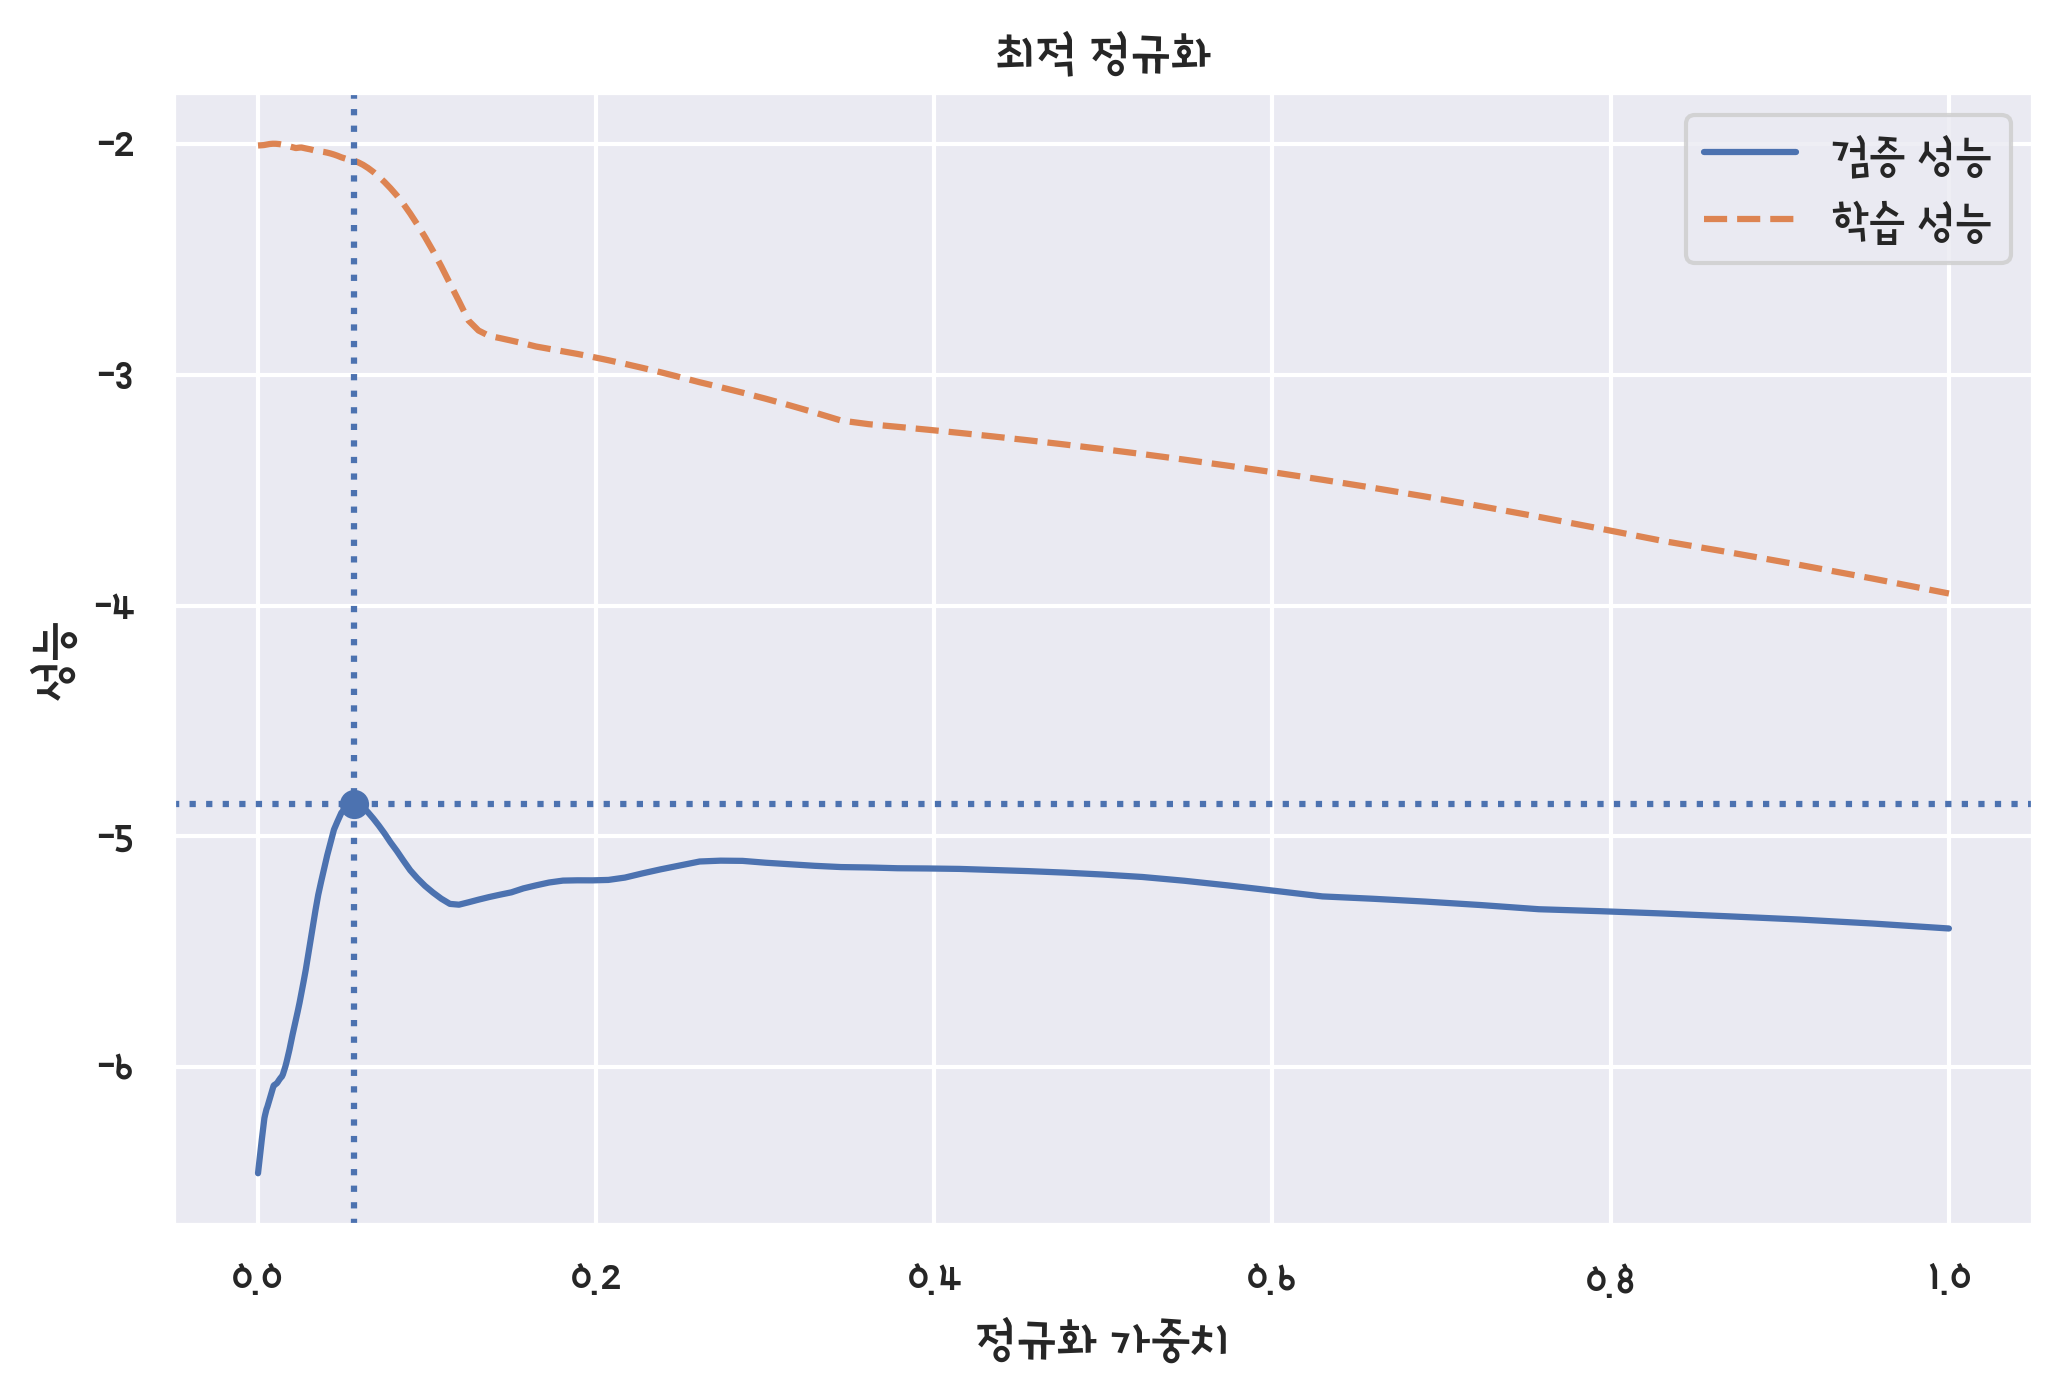

In [96]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X = Y_pred.drop(columns=['Y18'])
y = Y_pred['Y18']

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)
print(optimal_alpha)

plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

In [97]:
N = len(Y_pred)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

dfX_train = Y_pred.iloc[idx_train]
dfX_test = Y_pred.iloc[idx_test]

In [98]:
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=13)
for i, (idx_train, idx_test) in enumerate(cv.split(dfX_train)):
    df_train = dfX_train.iloc[idx_train]
    df_test = dfX_train.iloc[idx_test]
    
    model20 = sm.OLS.from_formula("Y18 ~ 1 +" + '+'.join(b), data=dfX_train)
    result20 = model20.fit()
    
    pred = result20.predict(df_test)
    rss = ((df_test.Y18 - pred) ** 2).sum()
    tss = ((df_test.Y18 - df_test.Y18.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result20.rsquared, rsquared))

pred = result20.predict(dfX_test)
rss = ((dfX_test.Y18 - pred) ** 2).sum()
tss = ((dfX_test.Y18 - dfX_test.Y18.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.95404730, 검증 R2 = 0.95265858
학습 R2 = 0.95404730, 검증 R2 = 0.93511920
학습 R2 = 0.95404730, 검증 R2 = 0.96495716
학습 R2 = 0.95404730, 검증 R2 = 0.96417472
학습 R2 = 0.95404730, 검증 R2 = 0.94263016
0.9504900638797171


In [99]:
from sklearn.linear_model import Lasso, Ridge

In [100]:
X = dfX_train.drop(columns=['Y18'])
y = dfX_train['Y18']

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model18 = Lasso(0.172)
    model18.fit(X_train, y_train)
    pred = model18.predict(X_test)
    rss = ((y_test - pred) ** 2).sum()
    tss = ((y_test - y_test.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(model18.score(X_test, y_test), rsquared))


pred = model18.predict(dfX_test.drop(columns=['Y18']))
rss = ((dfX_test.Y18 - pred) ** 2).sum()
tss = ((dfX_test.Y18 - dfX_test.Y18.mean())** 2).sum()
rsquared = 1 - rss / tss
print(rsquared)

학습 R2 = 0.92285981, 검증 R2 = 0.92285981
학습 R2 = 0.89027532, 검증 R2 = 0.89027532
학습 R2 = 0.94315430, 검증 R2 = 0.94315430
학습 R2 = 0.93493313, 검증 R2 = 0.93493313
학습 R2 = 0.90241774, 검증 R2 = 0.90241774
0.9127293186631104


In [101]:
model18.fit(Y_pred.drop(columns=['Y18']), Y_pred['Y18'])

Lasso(alpha=0.172, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
c = sensor_name
c.append('hour')
c

['Y00',
 'Y01',
 'Y02',
 'Y03',
 'Y04',
 'Y05',
 'Y06',
 'Y07',
 'Y08',
 'Y09',
 'Y10',
 'Y11',
 'Y12',
 'Y13',
 'Y14',
 'Y15',
 'Y16',
 'Y17',
 'hour']

In [103]:
df1[c]

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,hour
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,0
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,0
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,0
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,0
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,22.0,22.5,22.5,26.0,26.0,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0,23
4316,22.0,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5,23
4317,21.5,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0,23
4318,21.5,22.0,22.0,25.5,25.5,20.5,20.0,20.0,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0,23


In [104]:
X_30s['Y18'] = model18.predict(df1[c]).round(2)

In [105]:
X_30s

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y18
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,10.42
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,10.41
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,9.81
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,9.94
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,9.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0,1007.8,988.0,21.3,1007.8,1007.5,...,19.4,1008.2,16.68,3,0,82.3,74.3,0,23,21.12
4316,19.3,987.7,2.1,0.9,0,1007.8,988.1,21.3,1008.0,1007.4,...,18.5,1008.4,16.68,3,0,82.4,74.8,0,23,20.91
4317,19.5,987.8,0.9,1.3,0,1007.8,988.3,21.2,1008.1,1007.5,...,19.1,1008.4,16.68,3,0,82.8,75.4,0,23,20.65
4318,20.0,987.8,1.4,0.5,0,1007.8,988.3,21.1,1008.1,1007.5,...,19.0,1008.4,16.68,3,0,82.8,75.8,0,23,20.66


In [106]:
X_3s['Y18'] = df2['Y18']
X_3s

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y18
4320,19.3,987.7,0.9,2.2,0,1007.7,988.0,20.8,1007.8,1007.4,...,18.7,1008.3,0.00,3,0,84.0,77.6,0,0,20.5
4321,19.0,987.6,1.9,2.2,0,1007.7,988.0,20.6,1007.8,1007.4,...,19.0,1008.3,0.00,3,0,84.4,79.2,0,0,20.5
4322,19.1,987.6,2.0,1.4,0,1007.8,988.1,20.5,1007.9,1007.4,...,19.2,1008.3,0.00,3,0,84.9,79.9,0,0,20.5
4323,19.2,987.7,1.8,1.5,0,1007.9,988.1,20.5,1007.9,1007.5,...,19.3,1008.4,0.00,3,0,84.9,80.7,0,0,20.5
4324,19.2,987.8,1.4,1.4,0,1007.9,988.1,20.5,1007.8,1007.6,...,19.5,1008.4,0.00,3,0,84.9,80.9,0,0,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,19.9,987.6,0.9,0.8,0,1006.9,987.7,21.7,1007.5,1007.4,...,19.1,1007.5,22.16,2,0,82.3,58.6,1,23,21.5
4748,19.9,987.6,0.5,0.7,0,1006.8,987.7,21.6,1007.5,1007.4,...,19.2,1007.5,22.16,1,0,82.5,59.1,1,23,21.5
4749,19.7,987.7,0.9,0.6,0,1006.9,987.6,21.4,1007.4,1007.5,...,19.2,1007.5,22.16,2,0,83.0,58.9,1,23,21.5
4750,19.4,987.7,0.9,0.8,0,1006.9,987.8,21.3,1007.6,1007.5,...,19.3,1007.6,22.16,3,0,83.2,59.8,1,23,21.5


In [107]:
all_X = pd.concat([X_30s, X_3s])
all_X

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y18
0,9.7,988.8,1.2,0.6,0,1009.3,989.6,12.2,1009.9,1009.8,...,10.7,1010.1,0.00,2,0,77.2,62.6,0,0,10.42
1,9.3,988.9,1.7,1.9,0,1009.3,989.6,12.1,1010.0,1009.9,...,10.3,1010.1,0.00,2,0,77.3,63.5,0,0,10.41
2,9.4,989.0,1.1,2.3,0,1009.2,989.7,12.1,1010.1,1010.1,...,9.7,1010.0,0.00,2,0,77.3,63.9,0,0,9.81
3,9.4,988.9,1.5,0.7,0,1009.2,989.6,12.0,1010.0,1010.0,...,9.4,1010.1,0.00,2,0,77.5,64.5,0,0,9.94
4,9.2,988.9,0.8,1.7,0,1009.2,989.7,12.0,1010.1,1010.0,...,9.4,1010.1,0.00,1,0,78.0,65.0,0,0,9.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,19.9,987.6,0.9,0.8,0,1006.9,987.7,21.7,1007.5,1007.4,...,19.1,1007.5,22.16,2,0,82.3,58.6,1,23,21.50
4748,19.9,987.6,0.5,0.7,0,1006.8,987.7,21.6,1007.5,1007.4,...,19.2,1007.5,22.16,1,0,82.5,59.1,1,23,21.50
4749,19.7,987.7,0.9,0.6,0,1006.9,987.6,21.4,1007.4,1007.5,...,19.2,1007.5,22.16,2,0,83.0,58.9,1,23,21.50
4750,19.4,987.7,0.9,0.8,0,1006.9,987.8,21.3,1007.6,1007.5,...,19.3,1007.6,22.16,3,0,83.2,59.8,1,23,21.50


### LightGBM Regressor


LGBMRegressor(bagging_fraction=0.881, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.6655,
              importance_type='split', learning_rate=0.1, max_depth=23,
              min_child_samples=400, min_child_weight=10.11,
              min_split_gain=0.009961, n_estimators=100, n_jobs=-1,
              num_leaves=99, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

0.970486766242433

1.7930977547632143


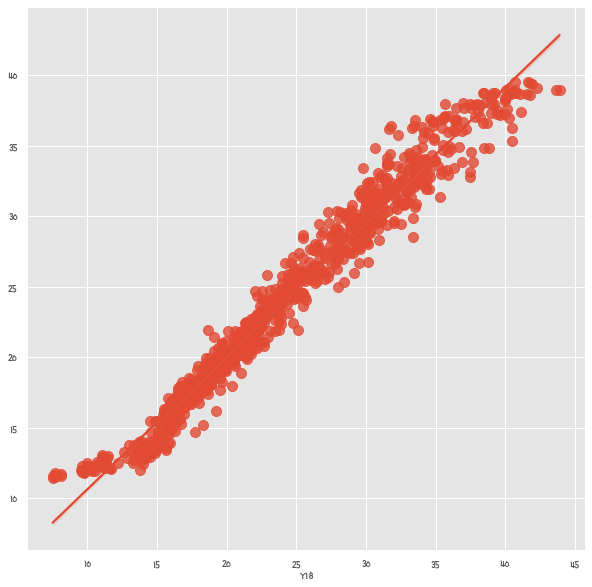

In [108]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline
import lightgbm as ltb
import warnings

plt.style.use('ggplot')

X = all_X.drop(columns = {'Y18'})
y = all_X.Y18

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
   
model33 = ltb.LGBMRegressor(feature_fraction = 0.6655, bagging_fraction = 0.881, max_depth= 23, min_split_gain= 0.009961, min_child_weight= 10.11, num_leaves= 99, min_child_samples=400)    
model33.fit(X_train, y_train)
print(); print(model33)
   
# make predictions
expected_y  = y_test
predicted_y = model33.predict(X_test)
   
# summarize the fit of the model
print(); print(metrics.r2_score(expected_y, predicted_y))
print(); print(metrics.mean_squared_error(expected_y, predicted_y))
   
plt.figure(figsize=(10,10))         
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [114]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [115]:
def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 100):
  dtrain = lgb.Dataset(data=X, label=y)
  def lgb_r2_score(preds, dtrain):
      labels = dtrain.get_label()
      return 'r2', r2_score(labels, preds), True
  # Objective Function
  def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        
          params = {'application':'regression','num_iterations': num_iterations,
                    'learning_rate':0.05, 'early_stopping_round':50,
                    'metric':'lgb_r2_score'} # Default parameters
          params["num_leaves"] = int(round(num_leaves))
          params['feature_fraction'] = max(min(feature_fraction, 1), 0)
          params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
          params['max_depth'] = int(round(max_depth))
          params['min_split_gain'] = min_split_gain
          params['min_child_weight'] = min_child_weight
          cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
                              verbose_eval =None, feval=lgb_r2_score)
          # print(cv_results)
          return np.max(cv_results['r2-mean'])
  # Domain space-- Range of hyperparameters 
  pds = {'num_leaves': (80, 100),
            'feature_fraction': (0.1, 0.9),
            'bagging_fraction': (0.8, 1),
            'max_depth': (17, 25),
            'min_split_gain': (0.001, 0.1),
            'min_child_weight': (10, 25)
            }

  # Surrogate model
  optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                    
  # Optimize
  optimizer.maximize(init_points=init_iter, n_iter=n_iters)

bayesion_opt_lgbm(X, y, init_iter=5, n_iters=10, random_state=77, seed = 101, num_iterations = 200)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.9931   |  0.9838   |  0.6138   |  23.03    |  12.09    |  0.009645 |  95.76    |
|  2        |  0.993    |  0.8652   |  0.5329   |  18.92    |  18.18    |  0.04065  |  94.3     |
|  3        |  0.9928   |  0.9673   |  0.5708   |  19.37    |  14.22    |  0.07085  |  88.45    |
|  4        |  0.9929   |  0.8115   |  0.6976   |  20.62    |  12.64    |  0.005888 |  85.85    |
|  5        |  0.9929   |  0.8134   |  0.7009   |  17.51    |  16.48    |  0.03705  |  83.04    |
|  6        |  0.9928   |  0.832    |  0.5685   |  24.78    |  24.53    |  0.05858  |  99.91    |
|  7        |  0.9928   |  0.887    |  0.5714   |  24.87    |  24.86    |  0.03633  |  80.5     |
|  8        |  0.993    |  0.998    |  0.5849   |  24.77    |  10.29    |  0.04306  |  99.85    |
|  9        |  0.992

### test data

In [116]:
test = pd.read_csv('./test.csv', encoding='utf-8')

In [117]:
hour= pd.Series((test.index%144/6).astype(int))
test['hour'] = list(hour)

In [118]:
test1 = test.drop(columns=['X14', 'X16', 'X19', 'id'], axis=1)

In [119]:
for x in direction_name:
    test1[x] = test1[x].apply(lambda x: 0 if x < 90 else 1 if x < 180 else 2 if x < 270 else 3)
# 북동 : 0 / 남동 : 1 / 남서 : 2 / 북서 : 3

In [120]:
for x in water_name:
    for i in range(1, len(x)):
        test1[x].loc[i] = test1[x].loc[i] - test1[x].loc[i-1]

In [121]:
for x in water_name:
    test1[x] = test1[x].apply(lambda x: 0 if x == 0  else 1)

In [122]:
test1

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
0,18.7,987.4,1.5,1.3,0,1006.8,987.7,21.1,1007.5,1007.2,...,17.5,19.2,1007.6,0.00,2,0,84.0,59.9,0,0
1,18.8,987.4,1.1,1.2,0,1006.7,987.7,21.2,1007.5,1007.2,...,17.4,19.1,1007.5,0.00,1,0,84.0,60.5,0,0
2,19.0,987.4,1.3,1.2,0,1006.6,987.6,21.2,1007.4,1007.2,...,17.2,19.0,1007.5,0.00,2,0,85.0,60.8,0,0
3,18.7,987.4,2.3,0.8,0,1006.6,987.6,21.1,1007.4,1007.2,...,17.2,18.8,1007.4,0.00,2,0,85.8,61.2,0,0
4,18.4,987.4,1.1,0.7,0,1006.7,987.7,20.9,1007.5,1007.2,...,17.4,18.9,1007.5,0.00,1,0,87.3,61.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,25.7,993.2,3.9,3.8,0,1011.7,993.8,26.3,1013.3,1012.6,...,23.6,24.4,1013.0,19.56,1,0,79.7,67.5,1,23
11516,25.6,993.2,3.0,3.0,0,1011.7,993.8,26.3,1013.3,1012.6,...,25.3,24.4,1012.9,19.56,1,0,79.6,67.9,1,23
11517,25.6,993.2,3.8,2.5,0,1011.9,993.7,26.2,1013.2,1012.7,...,24.9,24.3,1012.9,19.56,2,0,79.2,68.3,1,23
11518,25.5,993.2,2.4,2.8,0,1011.8,993.7,26.1,1013.2,1012.6,...,25.3,24.2,1012.9,19.56,1,0,80.1,68.8,1,23


### Y18 예측

In [123]:
answer = model33.predict(test1).round(2)
answer

array([19.68, 19.72, 19.57, ..., 27.38, 27.21, 27.21])

In [124]:
np.mean(answer)

28.327375868055555

In [125]:
answer_df = pd.DataFrame(answer)
answer_df.rename(columns={
    0 : 'Y18'
}, inplace=True)

In [126]:
answer_df['id'] = test['id']
answer_df = answer_df[['id', 'Y18']]

In [127]:
answer_df.to_csv('submission_0411.csv', index=False, encoding='utf-8')

In [128]:
answer_df

,id,Y18
0,4752,19.68
1,4753,19.72
2,4754,19.57
3,4755,19.10
4,4756,19.35
...,...,...
11515,16267,26.68
11516,16268,27.26
11517,16269,27.38
11518,16270,27.21
